
## Spark Overview


<p align="center">
    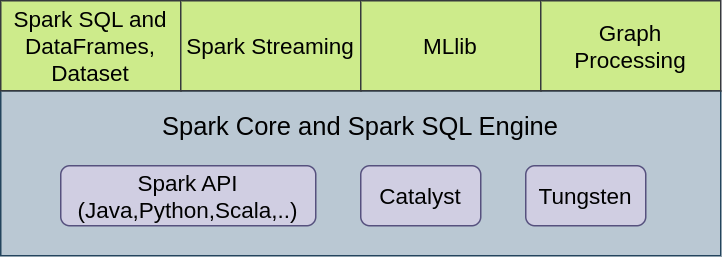

</p>


# Spark Application
A user program built on Spark using its APIs. It consists of a driver program and executors on the cluster.



<p align="center">
    <img src="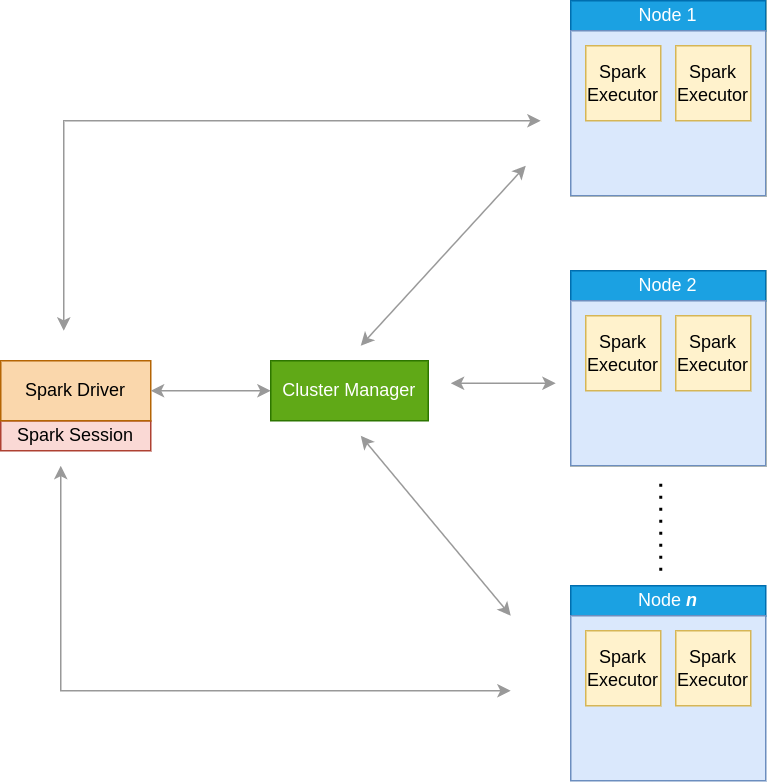
"
\>


## Spark Driver
The driver process runs your application, sits on a node in the cluster, and is responsible for two things:
1. Maintaining information about the Spark Application
2. Distributing, and scheduling work across the executors
### Spark Session
Spark Session is the primary interface of Apache Spark. It unifies various functionalities and resources, allowing users to process distributed data, run SQL queries, perform DataFrame operations, and more. It manages the SparkContext for task coordination across a cluster. In summary, Spark Session is the gateway for interacting with and executing distributed computations in Spark.






<p align="center">
    <img src="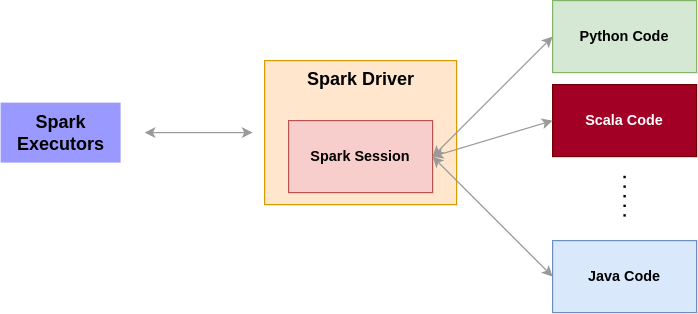
"
    \>

## Spark Executor
The executors are responsible for actually carrying out the work that the driver assigns them. This means that each executor is responsible for only two things:
1. Executing code assigned to it by the driver
2. Reporting the state of the computation on that executor back to the driver node


## Deployment modes
Spark's support for various deployment modes is a notable advantage, as it allows Spark to operate in diverse setups and environments. The cluster manager is independent of the execution location, as long as it can effectively manage Spark's executors and meet resource requirements. Consequently, Spark can be deployed in popular environments like Apache Hadoop YARN and Kubernetes, and it can function in different operational modes.


<p align="center">
    <img src="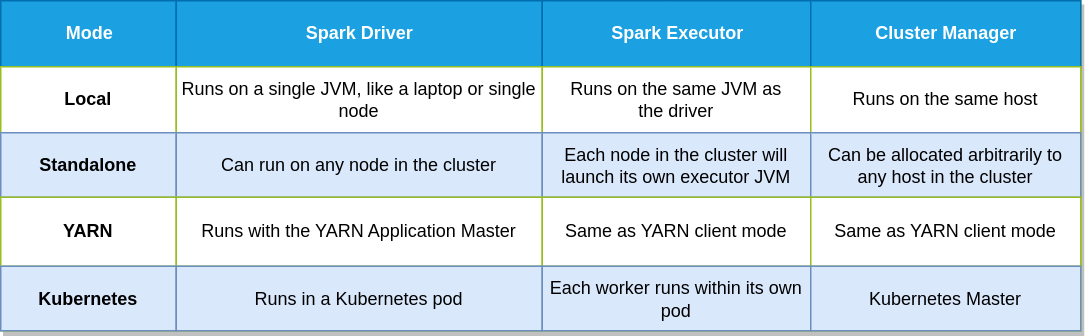
"
    \>

### Setup
Let's setup Spark on your Colab environment.  Run the cell below!

In [ ]:
# !pip install pyspark
# !pip install -U -q PyDrive
# !apt install openjdk-8-jdk-headless -qq
# import os
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

Let's set up the Spark session

There are two methods to create a Spark session:


1.   By initializing Spark once and creating it with SparkContext.

2.   By using the SparkSession builder to create it.




In [1]:
import pyspark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

In [2]:
### Stop spark if you have created spark session before
#spark.stop()
# create the session
conf = SparkConf()
conf.setAppName("DIS-lab-1")
conf.setMaster("local[*]")
conf.set("spark.driver.memory", "2G")
conf.set("spark.driver.maxResultSize", "2g")
conf.set("spark.executor.memory", "1G")
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()
### Creating spark session with inline configurations ###
# spark = SparkSession.builder \
#     .appName("DIS-lab-1") \
#     .master("local[*]") \
#     .config("spark.driver.memory", "2G") \
#     .config("spark.driver.maxResultSize", "2g") \
#     .getOrCreate()
spark

In [3]:
# Get the SparkConf object
conf = spark.sparkContext.getConf()

# Print the configuration
for key, value in conf.getAll():
    print(f"{key}: {value}")

spark.app.startTime: 1715758141358
spark.driver.port: 55468
spark.driver.memory: 2G
spark.driver.extraJavaOptions: -Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/jdk.internal.ref=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false
spark.sql.warehouse.dir: file

The official documentation for Spark configuration can be found on the Apache Spark website. Here's the link to the Spark Configuration page:

[Spark Configuration](https://spark.apache.org/docs/latest/configuration.html)

On this page, you will find detailed information about the various configuration options available in Spark. It provides explanations for each configuration property, including their default values and the possible values that can be assigned to them.

The Spark Configuration page also covers different ways to set configuration properties, such as through the command line, Spark properties file, or programmatically using SparkSession or SparkConf.

You can refer to this documentation to explore the available configuration options and understand how to customize and optimize Spark for your specific use cases.

## Resilient Distributed Dataset
The RDD (Resilient Distributed Dataset) is the fundamental abstraction in Spark, and it possesses three crucial characteristics:


1.   **Dependencies**: RDDs maintain information about their lineage, which refers to the set of dependencies between RDDs. This lineage enables fault tolerance by allowing RDDs to be reconstructed in case of failure
2.   **Partitions with Locality Information**: RDDs are logically divided into partitions, which are the basic units of parallelism in Spark. Each partition holds a subset of the data. Additionally, RDDs store locality information, which indicates the preferred location (e.g., node or data center) of each partition for optimized data processing.
3.  **Compute Function**: RDDs specify a compute function, represented by a transformation, which defines how to derive a new RDD from existing ones. The compute function takes a partition of the RDD and returns an iterator of elements of type T(**Iterator[T]**).

In Apache Spark, you can load data into an RDD from various sources using the sparkContext object. Here are a few examples of loading data into an RDD:


1.   **Parallelize**: You can create an RDD by parallelizing a collection of data in memory. The **parallelize()** method distributes the data across the RDD partitions.
  ```python
  from pyspark.sql import SparkSession

  spark = SparkSession.builder.getOrCreate()
  sc = spark.sparkContext

  data = [1, 2, 3, 4, 5]
  rdd = sc.parallelize(data)
  ```
2.   **Text file**: You can load an RDD from a text file in a distributed file system, such as Hadoop Distributed File System (HDFS) or Amazon S3.
  ```python
  from pyspark.sql import SparkSession

  spark = SparkSession.builder.getOrCreate()
  sc = spark.sparkContext

  rdd = sc.textFile("hdfs://path/to/file.txt")
  ```
3. **Sequence file**: A sequence file is a binary file format in Hadoop that stores key-value pairs. You can load an RDD from a sequence file.
  ```python
  from pyspark.sql import SparkSession

  spark = SparkSession.builder.getOrCreate()
  sc = spark.sparkContext

  rdd = sc.sequenceFile("hdfs://path/to/sequence_file")

  ```
4. **Custom data sources**: Spark supports loading data from various external data sources, such as databases (e.g., JDBC), NoSQL databases, Apache Kafka, and more. You can use the appropriate connector libraries and Spark APIs to load data from these sources into an RDD.
  ```python
  from pyspark.sql import SparkSession

  spark = SparkSession.builder.getOrCreate()
  sc = spark.sparkContext

  # Load data from a database using JDBC
  rdd = sc.jdbc("jdbc:postgresql://host:port/database", "table_name")

  ```





In [4]:
dataRDD = sc.parallelize([
    ("Vahid", 26, "Phd-1234"), ("Yannis", 41, "Prof-2314"),
    ("Enas", 35, "Phd-2356"), ("Duygu", 27, "Phd-3517"),
    ("Tom", 25, "Phd-2359"), ("Ioana", 35, "Prof-1246"),
    ("Timo", 45, "Msc-5431"), ("John", 33, "Msc-7194"),
    ("Linda", 30, "Phd-7890"), ("Mike", 29, "Msc-2468"),
    ("Sara", 38, "Prof-9753"), ("Emma", 31, "Phd-1478"),
    ("Alex", 36, "Prof-3698"), ("Sophia", 32, "Msc-8521"),
    ("Daniel", 28, "Phd-6397"), ("Olivia", 34, "Prof-4268"),
    ("Robert", 42, "Phd-5192"), ("Emily", 27, "Msc-6152"),
    ("Max", 29, "Msc-9472"), ("Ava", 31, "Prof-2468"),
    ("William", 33, "Phd-1382"), ("Mia", 35, "Prof-7634"),
    ("James", 40, "Msc-9573"), ("Charlotte", 28, "Phd-4297"),
    ("Benjamin", 37, "Prof-7641"),("Jack", 29, "Phd-7641")
    ])
type(dataRDD)

pyspark.rdd.RDD


##Spark Functions on RDD
Apache Spark provides various functions that can be applied to RDDs (Resilient Distributed Datasets). These functions allow you to perform transformations and actions on RDDs. Here are some commonly used functions in Spark for RDD operations:
### **Transformation**
Transformations create a new RDD from an existing RDD and are lazily evaluated. Transformations do not modify the original RDD; they produce a new RDD as a result.
1.   `map(func)`: Applies a function to each element of the RDD and returns a new RDD.
2.   `filter(func)`: Returns a new RDD with elements that satisfy the given predicate function.
3.`flatMap(func)`: Similar to map, but each input item can be mapped to zero or more output items.
4.`reduceByKey(func)`: Applies a reduction function to values of each key, grouping elements by key.
5.`sortByKey()`: Sorts the RDD elements by key in ascending order.
6.`groupBy(func)`: Groups elements based on a function and returns an RDD of grouped key-value pairs.
7.`join(otherRDD)`: Performs an inner join between two RDDs based on their keys.

### **Actions**
Actions trigger the execution of transformations and return results or perform side effects. Actions are eagerly evaluated and trigger the execution of transformations to produce results.


1. `collect()`: Returns all elements of the RDD as an array (local operation).
2. `count()`: Returns the count of elements in the RDD.
3. `first()`: Returns the first element of the RDD.
4. `take(n)`: Returns the first n elements of the RDD.
5. `reduce(func)`: Aggregates the elements of the RDD using a binary operator function.
6. `foreach(func)`: Applies a function to each element of the RDD (typically used for side effects).


These functions represent only a subset of the available operations on RDDs in Spark. There are many other transformations and actions available, such as `distinct()`, `union()`, ...




Let's calculate average age.

In [5]:
agesRDD = dataRDD.map(lambda x:x[1])
total_age = agesRDD.sum()
count = agesRDD.count()
avg_age = total_age/count
print(f"Average age:{avg_age}")

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 3 in stage 0.0 failed 1 times, most recent failure: Lost task 3.0 in stage 0.0 (TID 3) (145.136.131.96 executor driver): java.io.IOException: Cannot run program "python3": CreateProcess error=2, The system cannot find the file specified
	at java.base/java.lang.ProcessBuilder.start(ProcessBuilder.java:1170)
	at java.base/java.lang.ProcessBuilder.start(ProcessBuilder.java:1089)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:181)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:67)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1144)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:642)
	at java.base/java.lang.Thread.run(Thread.java:1570)
Caused by: java.io.IOException: CreateProcess error=2, The system cannot find the file specified
	at java.base/java.lang.ProcessImpl.create(Native Method)
	at java.base/java.lang.ProcessImpl.<init>(ProcessImpl.java:500)
	at java.base/java.lang.ProcessImpl.start(ProcessImpl.java:159)
	at java.base/java.lang.ProcessBuilder.start(ProcessBuilder.java:1126)
	... 19 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2463)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1049)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1048)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:195)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at java.base/jdk.internal.reflect.DirectMethodHandleAccessor.invoke(DirectMethodHandleAccessor.java:103)
	at java.base/java.lang.reflect.Method.invoke(Method.java:580)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:1570)
Caused by: java.io.IOException: Cannot run program "python3": CreateProcess error=2, The system cannot find the file specified
	at java.base/java.lang.ProcessBuilder.start(ProcessBuilder.java:1170)
	at java.base/java.lang.ProcessBuilder.start(ProcessBuilder.java:1089)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:181)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:67)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1144)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:642)
	... 1 more
Caused by: java.io.IOException: CreateProcess error=2, The system cannot find the file specified
	at java.base/java.lang.ProcessImpl.create(Native Method)
	at java.base/java.lang.ProcessImpl.<init>(ProcessImpl.java:500)
	at java.base/java.lang.ProcessImpl.start(ProcessImpl.java:159)
	at java.base/java.lang.ProcessBuilder.start(ProcessBuilder.java:1126)
	... 19 more


### Task 1


In [ ]:
# Get count of people above 30 and their average ages

## [YOUR CODE]

### Task 2


In [ ]:
## Get count of each group

## [YOUR CODE]

### Task 3

In [ ]:
## Get average age of each group

## [YOUR CODE]

## Dataframe
DataFrame is the most commonly used Structured API and serves as a representation of a tabular data structure consisting of rows and columns. The schema, which is a list defining the columns and their data types, provides the structure for the DataFrame.

In [ ]:
data_df = spark.createDataFrame([
    ("Vahid", 26, "Phd-1234"), ("Yannis", 41, "Prof-2314"),
    ("Enas", 35, "Phd-2356"), ("Duygu", 27, "Phd-3517"),
    ("Tom", 25, "Phd-2359"), ("Ioana", 35, "Prof-1246"),
    ("Timo", 45, "Msc-5431"), ("John", 33, "Msc-7194"),
    ("Linda", 30, "Phd-7890"), ("Mike", 29, "Msc-2468"),
    ("Sara", 38, "Prof-9753"), ("Emma", 31, "Phd-1478"),
    ("Alex", 36, "Prof-3698"), ("Sophia", 32, "Msc-8521"),
    ("Daniel", 28, "Phd-6397"), ("Olivia", 34, "Prof-4268"),
    ("Robert", 42, "Phd-5192"), ("Emily", 27, "Msc-6152"),
    ("Max", 29, "Msc-9472"), ("Ava", 31, "Prof-2468"),
    ("William", 33, "Phd-1382"), ("Mia", 35, "Prof-7634"),
    ("James", 40, "Msc-9573"), ("Charlotte", 28, "Phd-4297"),
    ("Benjamin", 37, "Prof-7641"),("Jack", 29, "Phd-7641")
    ],["Name", "Age","Id"])
data_df.show()


In [ ]:
data_df.printSchema()

In PySpark, there are several ways to load data into a DataFrame. Some of the common methods for loading data are:


1.   **Reading from a file**: PySpark supports reading data from various file formats such as CSV, JSON, Parquet, Avro, etc. You can use the spark.read API and specify the file format and options. For example:
  ```python
  df = spark.read.format("csv").option("header", "true").load("file.csv")

  ```
2.   **Reading from a database**: PySpark provides connectors for popular databases like MySQL, PostgreSQL, Oracle, etc. You can use the appropriate JDBC or ODBC connector to connect to the database and read data into a DataFrame. For example, to read from a MySQL database:
  ```python
  df = spark.read.format("jdbc").option("url", "jdbc:mysql://hostname:port/dbname").option("user", "username").option("password", "password").option("dbtable", "tablename").load()

  ```
3.  **Creating from an existing RDD**: If you have an existing RDD (Resilient Distributed Dataset), you can convert it into a DataFrame using the toDF()method. For example:
```python
  rdd = spark.sparkContext.parallelize([(1, "John"), (2, "Alice"), (3, "Bob")])
  df = rdd.toDF(["id", "name"])
  ```  
4.   **Creating programmatically**: You can create a DataFrame programmatically from a list of tuples or a list of dictionaries. For example:
  ```python
  data = [("John", 25), ("Alice", 30), ("Bob", 35)]
df = spark.createDataFrame(data, ["Name", "Age"])

  ```
5.   **Reading from a Hive table**: If you have a Hive table, you can read data into a DataFrame using Hive metastore. For example:
  ```python
  df = spark.table("database.tablename")

  ```




Let's try to read `csv` file

In [ ]:
df_california =spark.read.csv("./sample_data/california_housing_test.csv", header=True, inferSchema=True)

In [ ]:
df_california.show()

In [ ]:
df_california.printSchema()

---
In PySpark's DataFrame API, transformations and actions are two fundamental concepts used to process and manipulate data within a DataFrame.

**Transformations**

Some common transformations include `select()`, `filter()`, `groupBy()`, `orderBy()`, `withColumn()`, and `join()`.

**Actions**

Common actions include `show()`, `count()`, `collect()`, `take()`, `foreach()`, and `write()`.

PySpark's DataFrame API provides a wide range of functions that you can use to perform various operations and transformations on DataFrame columns. Here are some commonly used DataFrame API functions:

**Aggregate Functions:**

- `avg()`: Calculates the average of a numeric column.
- `sum()`: Computes the sum of a numeric column.
- `min()`: Finds the minimum value in a column.
- `max()`: Finds the maximum value in a column.
- `count()`: Counts the number of rows in a DataFrame or the number of non-null values in a column.
- `countDistinct()`: Counts the number of distinct values in a column.
- `first()`: Returns the first value in a column.
- `last()`: Returns the last value in a column.
- `mean()`: Calculates the mean of a numeric column.
- `stddev()`: Computes the standard deviation of a numeric column.
- `variance()`: Computes the variance of a numeric column.
- `corr()`: Computes the correlation between two columns.
- `cov()`: Computes the covariance between two columns.

**Column Manipulation Functions:**

- `col()`: Selects a column from a DataFrame based on the column name.
- `alias()`: Renames a column.
- `withColumn()`: Adds, replaces, or transforms a column.
- `drop()`: Drops one or more columns from a DataFrame.
- `select()`: Selects specific columns from a DataFrame.

**String Functions:**

- `concat()`: Concatenates multiple string columns or literals.
- `substring()`: Extracts a substring from a string column.
- `trim()`: Removes leading and trailing whitespace from a string column.
- `lower()`: Converts a string column to lowercase.
- `upper()`: Converts a string column to uppercase.
- `length()`: Computes the length of a string column.
- `like()`: Checks if a string column matches a pattern.

**Date and Time Functions:**

- `current_date()`: Returns the current date.
- `current_timestamp()`: Returns the current timestamp.
- `date_format()`: Formats a date column using a specified format.
- `year()`: Extracts the year from a date or timestamp column.
- `month()`: Extracts the month from a date or timestamp column.
- `day()`: Extracts the day of the month from a date or timestamp column.
- `hour()`: Extracts the hour from a timestamp column.
- `minute()`: Extracts the minute from a timestamp column.
- `second()`: Extracts the second from a timestamp column.

These are just a few examples of the functions available in the PySpark DataFrame API. There are many more functions that you can explore in the PySpark documentation based on your specific requirements.

---


Let's try to solve previous task with dataframe APIs

In [ ]:
from pyspark.sql import functions as F

### Task 1


In [ ]:
# Get count of people above 30 and their average ages

## [YOUR CODE]

### Task 2


In [ ]:
## Get count of each group

## [YOUR CODE]

### Task 3

In [ ]:
## Get average age of each group

## [YOUR CODE]

### Dataset
A Dataset in Spark is a distributed collection of data that is strongly-typed and provides a higher-level API compared to RDDs. It allows for efficient serialization, integration with Spark SQL, and supports both batch and streaming processing. Datasets are available in two APIs: DataFrame API (tabular structure with named columns) and Typed API (type-safe, object-oriented programming interface). They provide a structured and type-safe approach to distributed data processing in Spark.

Conceptually, you can think of a DataFrame in Scala as an alias for a collection of generic objects, `Dataset[Row]`, where a Row is a generic untyped JVM object that may hold different types of fields.

<p align="center">
    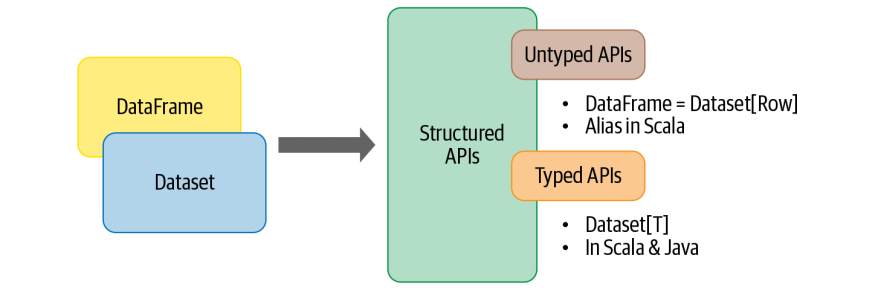


| Language | Typed and untyped main abstraction | Typed or untyped |
|----------|-----------------------------------|-----------------|
| Scala    | Dataset[T] and DataFrame (alias for Dataset[Row]) | Both typed and untyped |
| Java     | Dataset<T> | Typed |
| Python   | DataFrame | Generic Row untyped |
| R        | DataFrame | Generic Row untyped |